# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import networkx as nx

# Datasets

In [2]:
path = '/kaggle/input/coronavirusdataset/'
patient_data_path = path + 'patient.csv'
route_data_path = path + 'route.csv'
time_data_path = path + 'time.csv'

df_patient = pd.read_csv(patient_data_path)
df_route = pd.read_csv(route_data_path)
df_time = pd.read_csv(time_data_path)

## Patient

**Columns**

1. **id** the ID of the patient (n-th confirmed patient)
2. **sex** the sex of the patient
3. **birth_year** the birth year of the patient
4. **country** the country of the patient
5. **region** the region of the patient
6. **group** the collective infection
7. **infection_reason** the reason of infection
8. **infection_order** the order of infection
9. **infected_by** the ID of who has infected the patient
10. **contact_number** the number of contacts with people
11. **confirmed_date** the date of confirmation
12. **released_date** the date of discharge
13. **deceased_date** the date of decease
14. **state** isolated / released / deceased

In [3]:
df_patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [4]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 15 columns):
patient_id          7754 non-null int64
sex                 678 non-null object
birth_year          665 non-null float64
country             7754 non-null object
region              436 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7754 non-null object
released_date       55 non-null object
deceased_date       36 non-null object
state               7754 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 908.8+ KB


In [5]:
df_patient.isna().sum()

patient_id             0
sex                 7076
birth_year          7089
country                0
region              7318
disease             7726
group               7668
infection_reason    7600
infection_order     7718
infected_by         7684
contact_number      7701
confirmed_date         0
released_date       7699
deceased_date       7718
state                  0
dtype: int64

In [6]:
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
df_patient.released_date = pd.to_datetime(df_patient.released_date)
df_patient.deceased_date = pd.to_datetime(df_patient.deceased_date)

In [7]:
df_patient['time_from_confirmed_to_death'] = df_patient.deceased_date - df_patient.confirmed_date
df_patient['time_from_released_to_death'] = df_patient.released_date - df_patient.confirmed_date
df_patient['age'] = datetime.now().year - df_patient.birth_year 

In [8]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 18 columns):
patient_id                      7754 non-null int64
sex                             678 non-null object
birth_year                      665 non-null float64
country                         7754 non-null object
region                          436 non-null object
disease                         28 non-null float64
group                           86 non-null object
infection_reason                154 non-null object
infection_order                 36 non-null float64
infected_by                     70 non-null float64
contact_number                  53 non-null float64
confirmed_date                  7754 non-null datetime64[ns]
released_date                   55 non-null datetime64[ns]
deceased_date                   36 non-null datetime64[ns]
state                           7754 non-null object
time_from_confirmed_to_death    36 non-null timedelta64[ns]
time_from_released_to_death 

In [9]:
patient_deceased = df_patient[df_patient.state == 'deceased']
patient_isolated = df_patient[df_patient.state == 'isolated']
patient_released = df_patient[df_patient.state == 'released']

### Sex

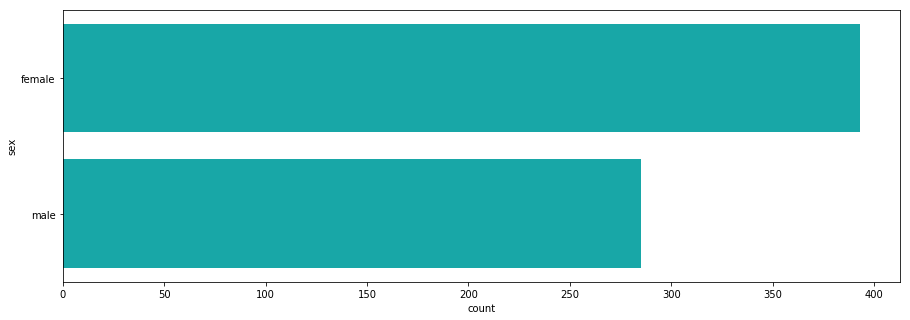

In [10]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="sex", data=df_patient, color="c");

### Age distribution of the deceased by gender

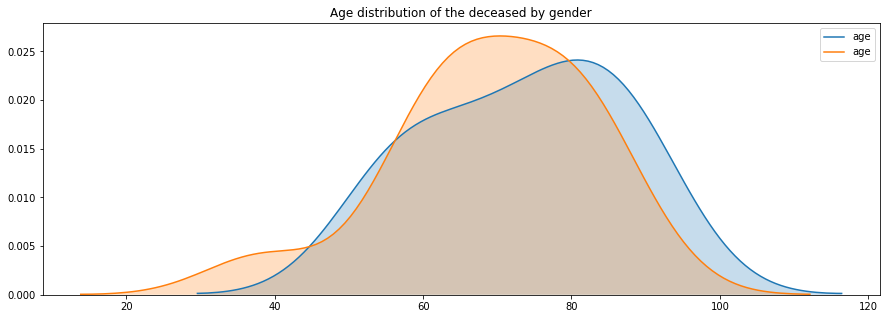

In [11]:
male_dead = patient_deceased[patient_deceased.sex=='male']
female_dead = patient_deceased[patient_deceased.sex=='female']
plt.figure(figsize=(15,5))
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_dead['age'], shade=True);
sns.kdeplot(data=male_dead['age'], shade=True);

### Birth year

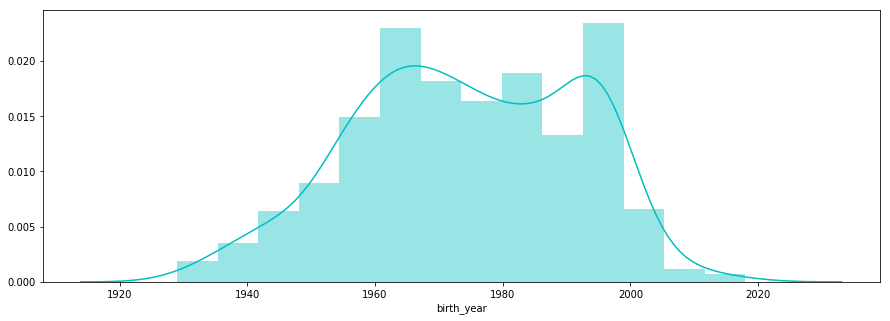

In [12]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df_patient.birth_year, color='c');

### Age

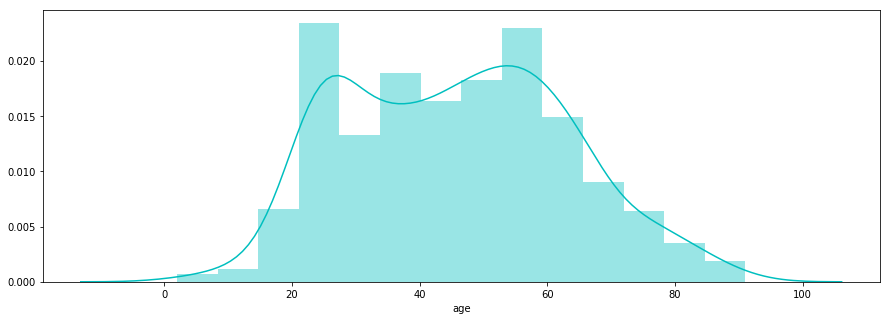

In [13]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df_patient.age, color='c');

### Country

In [14]:
df_patient.country.value_counts()

Korea       7745
China          8
Mongolia       1
Name: country, dtype: int64

### Infection reason

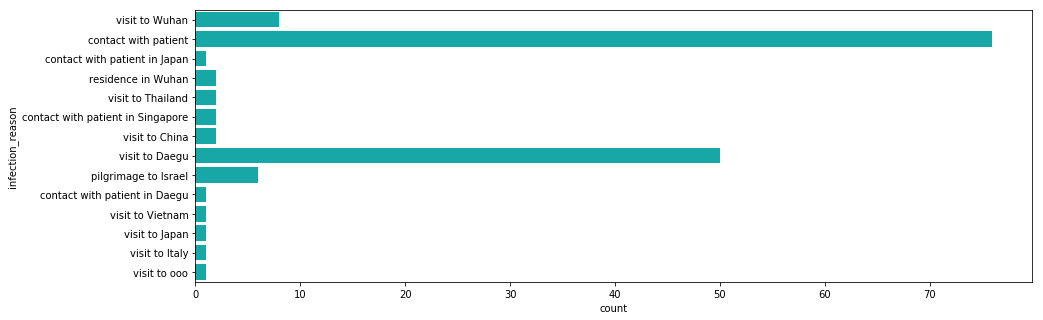

In [15]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="infection_reason", data=df_patient, color="c");

### Region

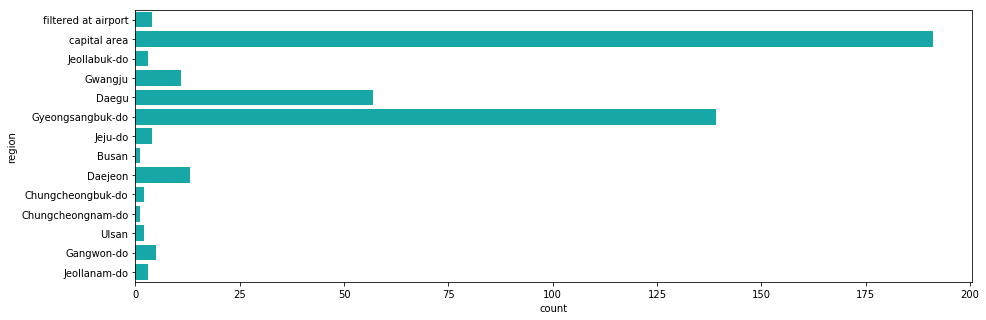

In [16]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="region", data=df_patient, color="c");

### State

In [17]:
df_patient.state.value_counts()

isolated    7663
released      55
deceased      36
Name: state, dtype: int64

### State / Age

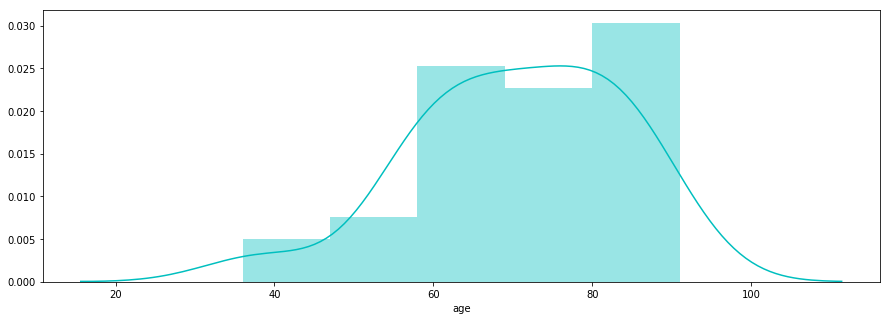

In [18]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(patient_deceased.age, color='c');

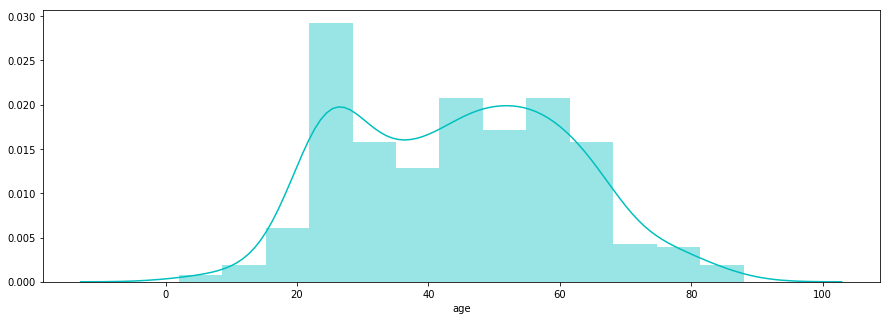

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(patient_isolated.age, color='c');

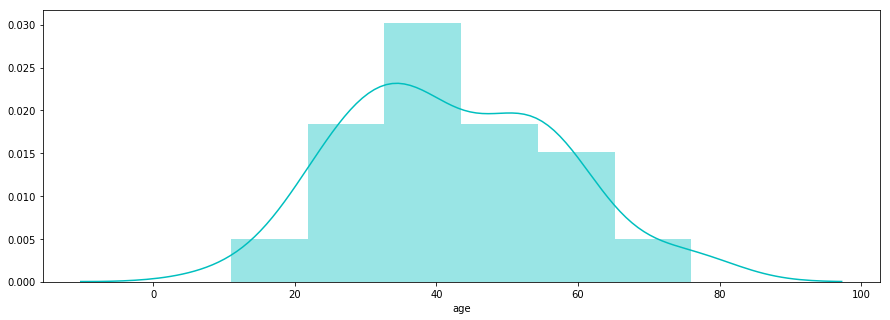

In [20]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(patient_released.age, color='c');

### Daily confirmations

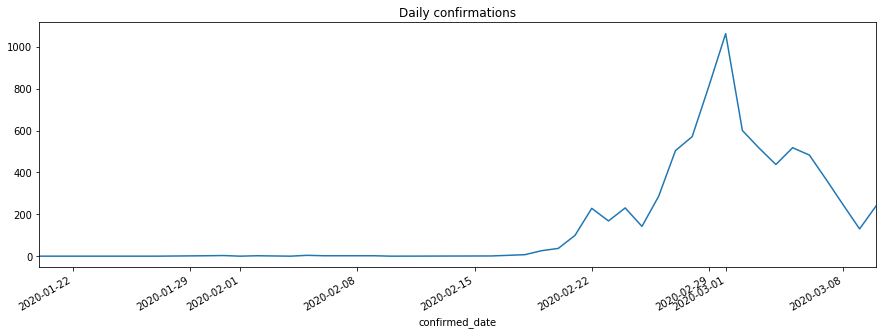

In [21]:
plt.figure(figsize=(15,5))
plt.title('Daily confirmations')
df_patient.groupby('confirmed_date').patient_id.count().plot();

### Confirmed count

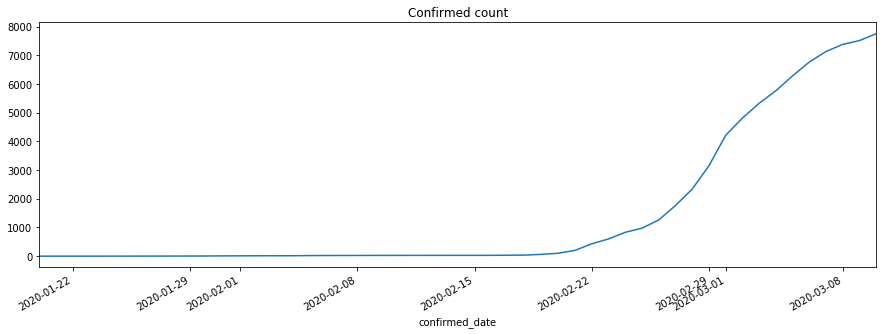

In [22]:
plt.figure(figsize=(15,5))
plt.title('Confirmed count')
df_patient.groupby('confirmed_date').patient_id.count().cumsum().plot();

### Infection networks

In [23]:
data_infected_by = df_patient[df_patient.infected_by.notnull()]

def get_sex_for_patient_id(id):
    return df_patient[df_patient.patient_id == id].sex.values[0]

def get_country_for_patient_id(id):
    return df_patient[df_patient.patient_id == id].country.values[0]

#### Infection network for all samples

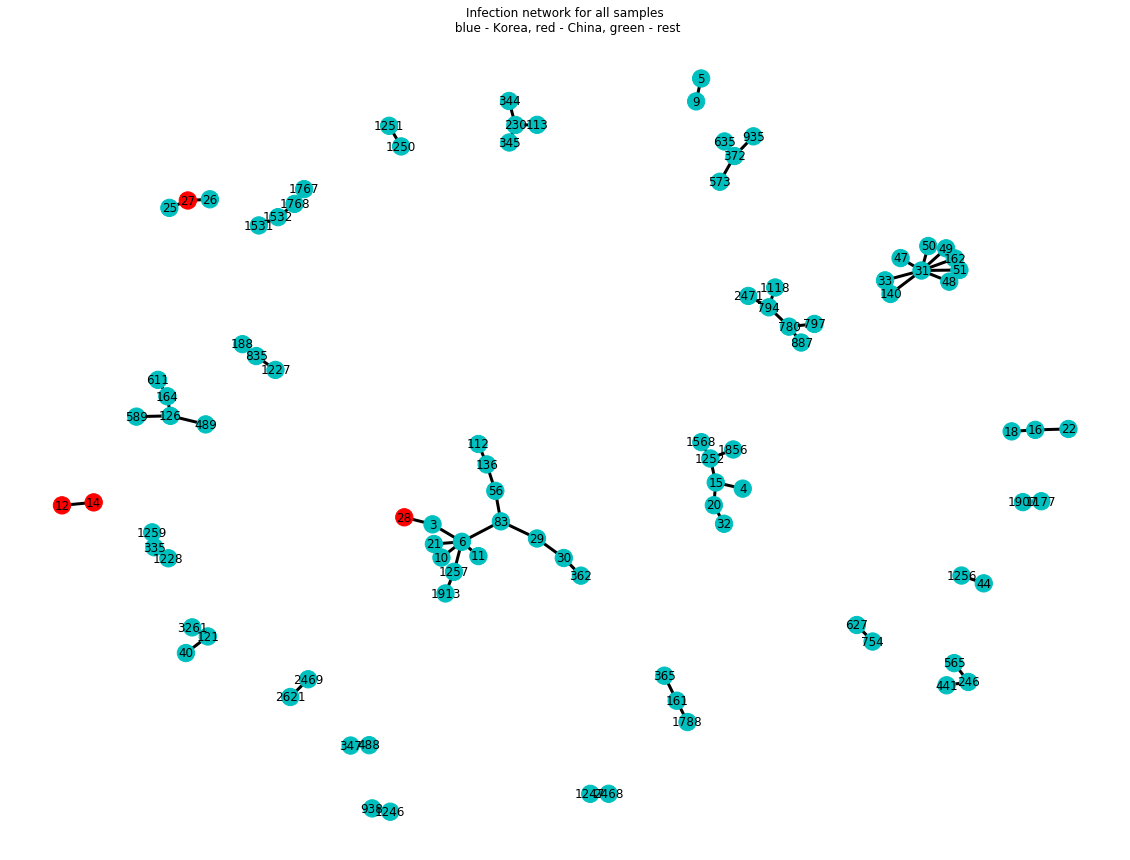

In [24]:
values = data_infected_by[['patient_id', 'infected_by']].values.astype(int)

plt.figure(figsize=(20,15))
plt.title("Infection network for all samples\n blue - Korea, red - China, green - rest")
G1=nx.Graph()
G1.add_edges_from(values)
c_map =  ['c' if get_country_for_patient_id(node) == 'Korea' 
          else 'r' if get_country_for_patient_id(node) == 'China' 
          else 'g'
          for node in G1 ]
c_map
nx.draw(G1,with_labels=True,node_color=c_map, width=3.0, node_size=300)

#### Infection network in Korea

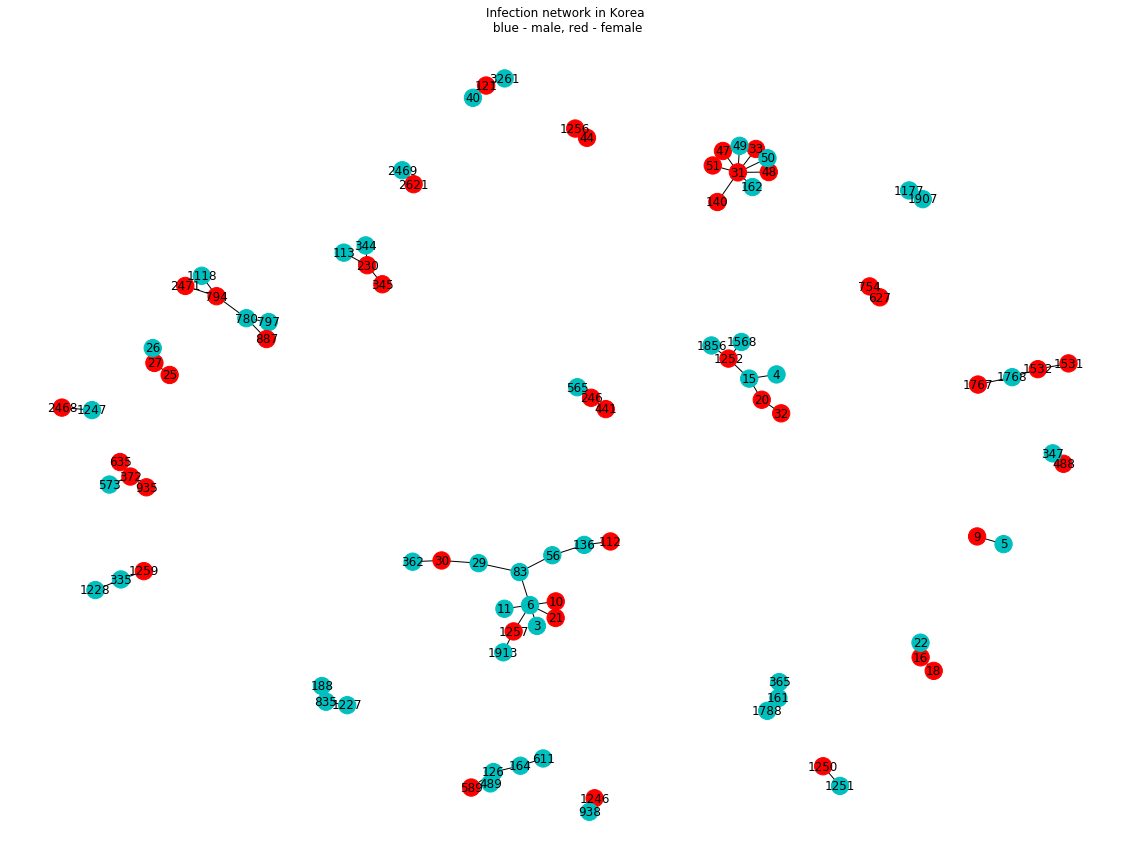

In [25]:
infected_network_korea = data_infected_by[data_infected_by.country == 'Korea']
values = infected_network_korea[['patient_id', 'infected_by']].values.astype(int)

plt.figure(figsize=(20,15))
plt.title("Infection network in Korea\n blue - male, red - female")
G1=nx.Graph()
G1.add_edges_from(values)
c_map =  ['c' if get_sex_for_patient_id(node) == 'male' else 'r' for node in G1 ]
nx.draw(G1,with_labels=True,node_color=c_map)

# Route

**Columns**


1. **id** the ID of the patient (n-th confirmed patient)
2. **date** Year-Month-Day
3. **province** Special City / Metropolitan City / Province(-do)
4. **city** City(-si) / Country (-gun) / District (-gu)
5. **visit** the type of place visited
6. **latitude** WGS84
7. **longitude** WGS84

In [26]:
df_route.head()

,patient_id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [27]:
df_route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
patient_id    212 non-null int64
date          212 non-null object
province      212 non-null object
city          212 non-null object
visit         212 non-null object
latitude      212 non-null float64
longitude     212 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.7+ KB


### City

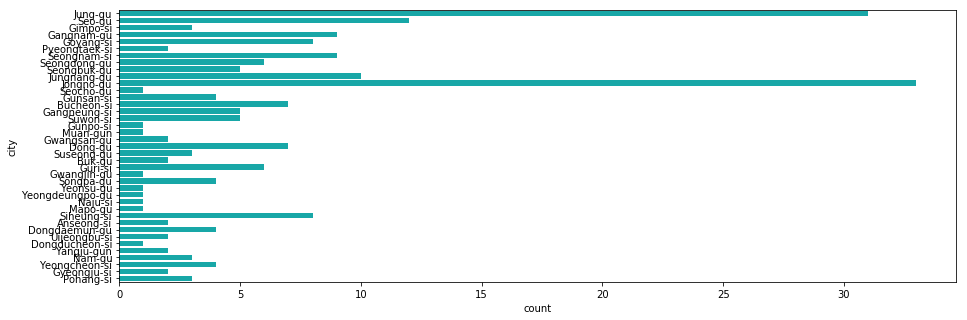

In [28]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="city", data=df_route, color="c");

### Province

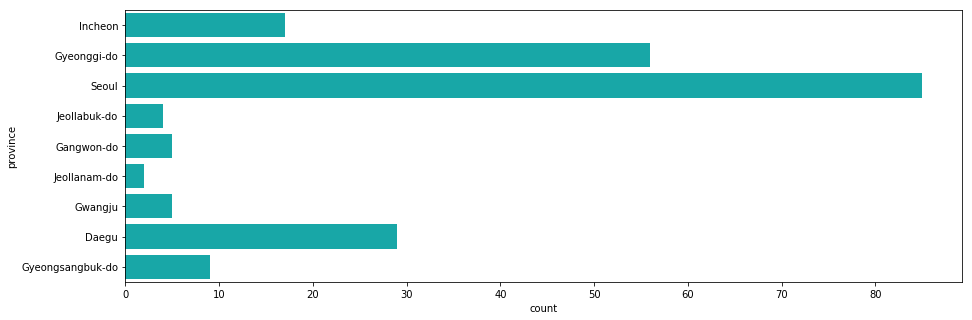

In [29]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="province", data=df_route, color="c");

### Visit

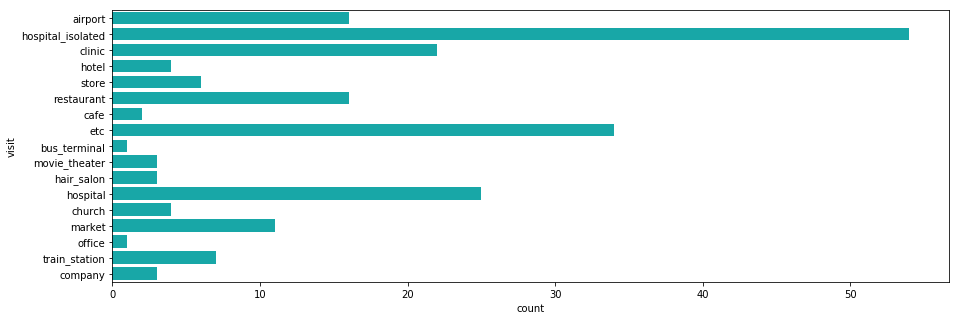

In [30]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="visit", data=df_route, color="c");

### Latitude / Longitude

In [31]:
import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=8,tiles='Stamen Toner')

for lat, lon in zip(df_route['latitude'], df_route['longitude']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(southkorea_map)
southkorea_map

## Time

**Columns**

1. **date** Year-Month-Day
2. **acc_test** the accumulated number of tests
3. **acc_negative** the accumulated number of negative results
4. **acc_confirmed** the accumulated number of positive results
5. **acc_released** the accumulated number of releases
6. **acc_deceased** the accumulated number of deceases
7. **new_test** the number of new tests
8. **new_negative** the number of new negative results
9. **new_confirmed** the number of new positive results
10. **new_released** the number of new releases
11. **new_deceased** the number of new deceases

In [32]:
df_time.head()

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,...,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 24 columns):
date                 52 non-null object
time                 52 non-null int64
test                 52 non-null int64
negative             52 non-null int64
confirmed            52 non-null int64
released             52 non-null int64
deceased             52 non-null int64
Seoul                52 non-null int64
Busan                52 non-null int64
Daegu                52 non-null int64
Incheon              52 non-null int64
Gwangju              52 non-null int64
Daejeon              52 non-null int64
Ulsan                52 non-null int64
Sejong               52 non-null int64
Gyeonggi-do          52 non-null int64
Gangwon-do           52 non-null int64
Chungcheongbuk-do    52 non-null int64
Chungcheongnam-do    52 non-null int64
Jeollabuk-do         52 non-null int64
Jeollanam-do         52 non-null int64
Gyeongsangbuk-do     52 non-null int64
Gyeongsangnam-do     52 non-null int64

In [34]:
df_time.describe()

,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,Incheon,...,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,12.923077,44366.096154,34494.538462,1516.884615,30.730769,10.038462,37.134615,27.076923,1100.903846,3.307692,...,0.826923,38.423077,5.980769,4.596154,21.230769,2.461538,1.057692,237.403846,20.903846,1.038462
std,6.367337,67123.084026,55898.444563,2530.019644,59.951652,17.116626,46.317755,39.175245,1904.605855,4.368059,...,1.937465,49.974639,9.750798,7.711106,37.649891,2.593064,1.685154,379.722668,31.228607,1.481408
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,414.500000,317.500000,14.250000,0.000000,0.000000,4.750000,0.000000,0.000000,1.000000,...,0.000000,7.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,7488.000000,6913.500000,28.000000,8.000000,0.000000,14.000000,0.000000,0.000000,1.000000,...,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,70280.750000,41636.750000,1908.750000,26.250000,13.000000,57.500000,62.000000,1244.000000,3.250000,...,1.000000,64.500000,6.250000,8.250000,17.750000,5.000000,1.000000,361.000000,44.500000,2.000000
max,16.000000,222395.000000,196100.000000,7755.000000,288.000000,60.000000,193.000000,98.000000,5794.000000,25.000000,...,10.000000,175.000000,29.000000,27.000000,112.000000,7.000000,5.000000,1135.000000,84.000000,4.000000


# To be continued...